In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from config import akey

In [3]:
file = 'api-data/yearly_summary/prices_for_2020.csv'
stocks = pd.read_csv(file)
stocks.head()

,Date,Close,Ticker,Industry,Sector,FullTimeEmployees
0,2020-01-31,7.93,TRST,Financial Services,Banks-Regional,771
1,2020-01-31,17.51,LNTH,Healthcare,Diagnostics & Research,508
2,2020-01-31,27.61,EPRT,Real Estate,REIT-Diversified,27
3,2020-01-31,42.14,MDC,Consumer Cyclical,Residential Construction,1656
4,2020-01-31,9.58,VRA,Consumer Cyclical,Footwear & Accessories,2700


In [4]:
stocks['Date'] = pd.to_datetime(stocks['Date'], format='%Y-%m-%d')
stocks.head()

,Date,Close,Ticker,Industry,Sector,FullTimeEmployees
0,2020-01-31,7.93,TRST,Financial Services,Banks-Regional,771
1,2020-01-31,17.51,LNTH,Healthcare,Diagnostics & Research,508
2,2020-01-31,27.61,EPRT,Real Estate,REIT-Diversified,27
3,2020-01-31,42.14,MDC,Consumer Cyclical,Residential Construction,1656
4,2020-01-31,9.58,VRA,Consumer Cyclical,Footwear & Accessories,2700


Industry
Basic Materials           AxesSubplot(0.125,0.2;0.775x0.68)
Communication Services    AxesSubplot(0.125,0.2;0.775x0.68)
Consumer Cyclical         AxesSubplot(0.125,0.2;0.775x0.68)
Consumer Defensive        AxesSubplot(0.125,0.2;0.775x0.68)
Energy                    AxesSubplot(0.125,0.2;0.775x0.68)
Financial Services        AxesSubplot(0.125,0.2;0.775x0.68)
Healthcare                AxesSubplot(0.125,0.2;0.775x0.68)
Industrials               AxesSubplot(0.125,0.2;0.775x0.68)
Real Estate               AxesSubplot(0.125,0.2;0.775x0.68)
Technology                AxesSubplot(0.125,0.2;0.775x0.68)
Utilities                 AxesSubplot(0.125,0.2;0.775x0.68)
Name: Close, dtype: object

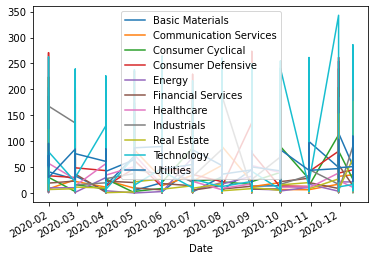

In [5]:
stocks.set_index('Date', inplace=True)
stocks.groupby('Industry')['Close'].plot(legend=True)

In [7]:
real_estate = stocks[stocks['Industry'] == 'Consumer Cyclical']
real_estate.head()

,Close,Ticker,Industry,Sector,FullTimeEmployees
Date,,,,,
2020-01-31,42.14,MDC,Consumer Cyclical,Residential Construction,1656
2020-01-31,9.58,VRA,Consumer Cyclical,Footwear & Accessories,2700
2020-01-31,17.22,MOV,Consumer Cyclical,Luxury Goods,1145
2020-01-31,70.96,MTH,Consumer Cyclical,Residential Construction,1510
2020-01-31,79.74,LGIH,Consumer Cyclical,Residential Construction,953


<Figure size 1440x720 with 0 Axes>

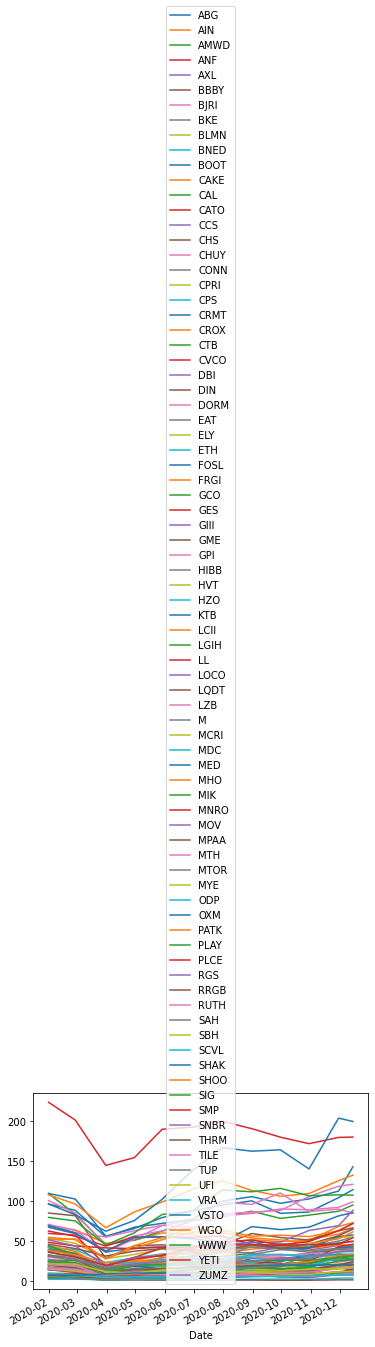

<Figure size 1440x720 with 0 Axes>

In [8]:
real_estate.groupby('Ticker')['Close'].plot( legend=True)
plt.figure(figsize=(20, 10))

In [11]:
file2 = 'api-data/all_info.csv'
all_info = pd.read_csv(file2)
all_info.head()

,Date,Close,Ticker,Year,Month,Industry,Sector,Full Time Emp
0,1999-12-31,20.00,CLB,1999,12,Energy,Oil & Gas Equipment & Services,3800.0
1,1999-12-31,10.38,CENT,1999,12,Consumer Defensive,Packaged Foods,5600.0
2,1999-12-31,0.08,RDNT,1999,12,Healthcare,Diagnostics & Research,6165.0
3,1999-12-31,11.63,ESE,1999,12,Technology,Scientific & Technical Instruments,2713.0
4,1999-12-31,20.75,FBP,1999,12,Financial Services,Banks-Regional,2674.0


In [13]:
all_info['Bins'] = pd.cut(all_info['Full Time Emp'], bins=5)
all_info.head(30)

,Date,Close,Ticker,Year,Month,Industry,Sector,Full Time Emp,Bins
0,1999-12-31,20.000,CLB,1999,12,Energy,Oil & Gas Equipment & Services,3800.0,"(-140.0, 28000.0]"
1,1999-12-31,10.380,CENT,1999,12,Consumer Defensive,Packaged Foods,5600.0,"(-140.0, 28000.0]"
2,1999-12-31,0.080,RDNT,1999,12,Healthcare,Diagnostics & Research,6165.0,"(-140.0, 28000.0]"
3,1999-12-31,11.630,ESE,1999,12,Technology,Scientific & Technical Instruments,2713.0,"(-140.0, 28000.0]"
4,1999-12-31,20.750,FBP,1999,12,Financial Services,Banks-Regional,2674.0,"(-140.0, 28000.0]"
5,1999-12-31,96.000,PRK,1999,12,Financial Services,Banks-Regional,1907.0,"(-140.0, 28000.0]"
6,1999-12-31,22.810,MATX,1999,12,Industrials,Marine Shipping,1988.0,"(-140.0, 28000.0]"
7,1999-12-31,62.190,SCHL,1999,12,Communication Services,Publishing,8300.0,"(-140.0, 28000.0]"
8,1999-12-31,37.630,CHS,1999,12,Consumer Cyclical,Apparel Retail,4788.0,"(-140.0, 28000.0]"
9,1999-12-31,16.880,STAR,1999,12,Real Estate,REIT-Diversified,155.0,"(-140.0, 28000.0]"


In [54]:
stock_perf = all_info.groupby(['Sector','Ticker','Year'],sort=False).apply(lambda x: (x['Close'].values[-1] - x['Close'].values[0]) / x['Close'].values[-1] * 100)\
    .reset_index(name='pct change')
stock_summary = stock_perf.pivot(index='Ticker', columns='Year', values='pct change')
stock_summary.fillna(0, inplace=True)
stock_summary.to_csv('api-data/yearly_summary/stock_matrix.csv')

In [43]:
sectors = all_info.groupby(['Sector','Year'])[]
sectors
#sector_perf = all_info.groupby(['Sector','Year'],sort=False).apply(lambda x: (x['Close'].values[-1] - x['Close'].values[0]) / x['Close'].values[-1] * 100)\
#    .reset_index(name='pct change')
#sector_summary = sector_perf.pivot(index='Sector', columns='Year', values='pct change')
#sector_summary.fillna(0, inplace=True)
#sector_summary

Close  Month  Full Time Emp
Sector               Year                                 
Advertising Agencies 1999  27.440000   12.0         6388.0
                     2000  23.756667    6.5         6388.0
                     2001  30.550833    6.5         6388.0
                     2002  44.067500    6.5         6388.0
                     2003  42.215833    6.5         6388.0
...                              ...    ...            ...
Waste Management     2016  43.689167    6.5         3800.0
                     2017  50.302083    6.5         3800.0
                     2018  62.744167    6.5         3800.0
                     2019  60.030833    6.5         3800.0
                     2020  36.015833    6.5         3800.0

[2466 rows x 3 columns]